In [1]:
using PyPlot
using Interact
using GeometricIntegrators
include("methods.jl");

In [2]:
function pendulum_rhs(t, x, f)
    f[1] = x[2]
    f[2] = -sin(x[1])
end

function hamiltonian(x)
    x[2]^2/2 + cos(x[1])
end

function rk_solve(n; start=[pi/4, 0.0])
    ode = ODE(pendulum_rhs, start)
    int = Integrator(ode, getTableauExplicitEuler(), 0.1)
    res = integrate(int, n)

    angles = collect(res.q[1,:])
    d_angles = collect(res.q[2, :])
    
    (angles, d_angles)
end;

Interact.Slider{Int64}(41: "input-11" = 1 Int64 , "", 1, 1:5:396, "horizontal", true, "d", true)

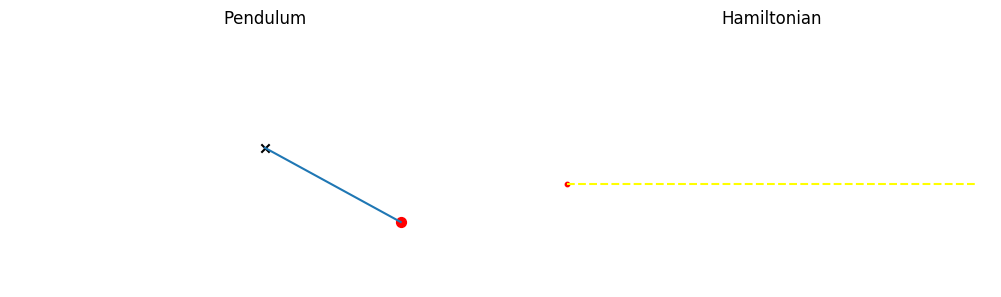

In [13]:
plot_result(rk_solve, 400)

Interact.Options{:ToggleButtons,Any}(29: "input-8" = 100 Any , "N", 100, "100", 0, Interact.OptionDict(DataStructures.OrderedDict{Any,Any}("100"=>100,"1000"=>1000,"10000"=>10000,"100000"=>100000), Dict{Any,Any}(Pair{Any,Any}(100, "100"),Pair{Any,Any}(10000, "10000"),Pair{Any,Any}(100000, "100000"),Pair{Any,Any}(1000, "1000"))), Any[], Any[], true, "horizontal")

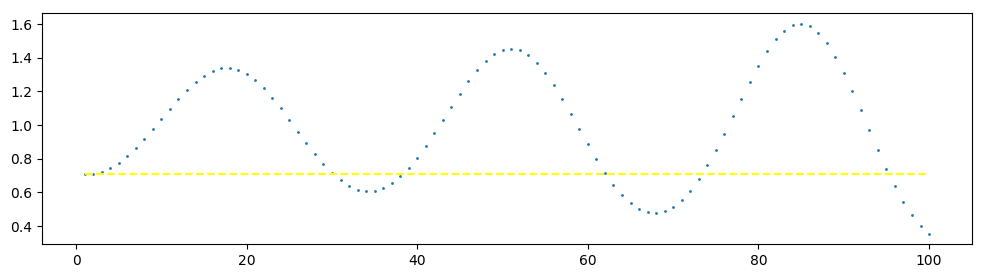

In [10]:
plot_hamiltonian(rk_solve)

Interact.Slider{Int64}(13: "input-4" = 1 Int64 , "", 1, 1:5:396, "horizontal", true, "d", true)

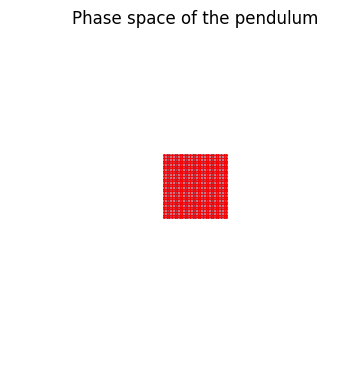

In [6]:
plot_phase_space(rk_solve, 400)

In [ ]:
function pendulum_v(t, q, p, v)
    v[1] = p[1]
end

function pendulum_f(t, q, p, f)
    f[1] = -sin(q[1])
end

function simpl_solve(n; start=[pi/4, 0.0])
    ode = PODE(pendulum_v, pendulum_f, [start[1]], [start[2]])
    int = Integrator(ode, getTableauSymplecticEulerA(), 0.1)
    res = integrate(int, n)
    
    angles = collect(res.q)
    d_angles = collect(res.p)
    
    (angles, d_angles)
end;

In [ ]:
plot_result(simpl_solve, 400)

In [ ]:
plot_hamiltonian(simpl_solve)

In [ ]:
plot_phase_space(simpl_solve, 400)